# **Methods for feature selection**

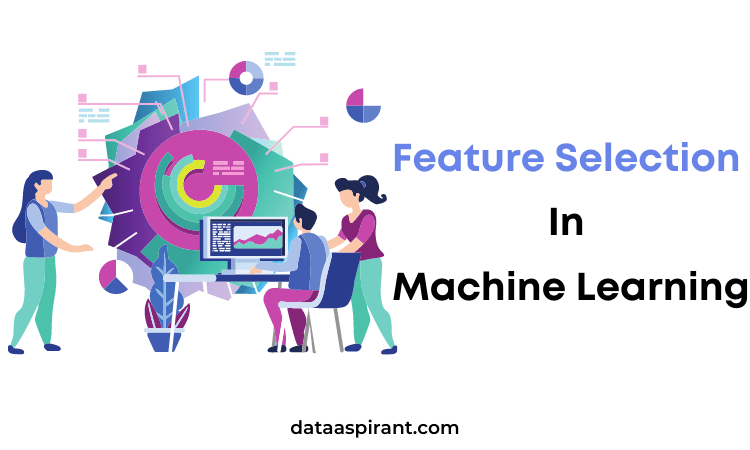

**Feature selection is an important technique in machine learning to get the best features that 
are suitable for business problem and following differnt methods for selecting features.**

* [Variance Threshold](#vr)
* [Droping Feature with High Correlation](#cor)  
* [Using Information Gain](#info) 
* [Using Feature importance](#impo)

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

In [ ]:
X, y = data.drop('claim', axis=1) , data['claim']
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=.3 , random_state=4)

### Dropping constant feature

<a id="vr"></a>
**Variance Threshold** |  [WebLink](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

Removing features with low variance

In [ ]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(X_train)

In [ ]:
constant_column = [column for column in X_train.columns if column not in X_train.columns[var_threshold.get_support()]]
print([feature for feature in constant_column])

> There are no feature with contant variance in this data set.

<a id="cor"></a>
**Droping Feature with High Correlation**

Using Pearson correlation

In [ ]:
def finding_correlation(data, threshold):
    correlated_columns = set()
    correlation_matrix = X.corr()
    for i in range(correlation_matrix.shape[0]):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correlated_columns.add(column_name)
    return correlated_columns

In [ ]:
print(finding_correlation(X_train, .7))
print(finding_correlation(X_train, .9))

And as we can see there are no feature which are highly correlated, so it good to go! But if you features in set you can drop them.

<a id="info"></a>
**Using  Mutual Information** | [WebLink](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

Selecting feature using Mutual Information for discrete target variable

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Here as we can see, the Mutual information from every feature and based on that we can select k features, i.e. top 10 or 20 or any number of features we can select depend of the available data. <br>
Here I am selecting top **50 features**.

In [ ]:
select_k_features  = SelectKBest(mutual_info_classif, k=50)
select_k_features.fit(X_train, y_train)
select_k_features

In [ ]:
X_train.columns[select_k_features.get_support()]

<a id="impo"></a>
**Using Feature importance** | [WebLink](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

For calculating feature importance you can use any classifier such as RandomForest, ExtraTree, and Xgboost classifier etc.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree_classifier = ExtraTreesClassifier()
tree_classifier.fit(X_train, y_train)

In [ ]:
tree_classifier.feature_importances_

In [ ]:
feature_importance = pd.Series(tree_classifier.feature_importances_, index=X_train.columns)
feature_importance

You can sort above series by feature_importances_ and select the top n feature that you want to include in your model based on importance.

**This kernel just includes different approaches for selecting features, if you find this useful please provide you constructive feedback to improve or to add any other methods.**

In the next version I'll be adding 

1. Forward Selection
2. Backward Selection
3. Filter vs Wrapper method
4. Xgboost and other ensemble technique 